### Data Preparation

Download the historial daily data of the entire 2018 for the 10 stocks

```python
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']
```


You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe" which is the entire stock market you can trade.


In [1]:
import pandas as pd
import numpy as np

# universe of stocks
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']

# read csv and create df for each stock
ibm = pd.read_csv('ibm.csv')
msft = pd.read_csv('msft.csv')
goog = pd.read_csv('goog.csv')
aapl = pd.read_csv('aapl.csv')
amzn = pd.read_csv('amzn.csv')
meta = pd.read_csv('meta.csv')
nflx = pd.read_csv('nflx.csv')
tsla = pd.read_csv('tsla.csv')
orcl = pd.read_csv('orcl.csv')
sap = pd.read_csv('sap.csv')

# sort df by date in ascending order
def sort_by_date(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
    return df.sort_values(by='Date').reset_index(drop=True)
ibm = sort_by_date(ibm)
msft = sort_by_date(msft)
goog = sort_by_date(goog)
aapl = sort_by_date(aapl)
amzn = sort_by_date(amzn)
meta = sort_by_date(meta)
nflx = sort_by_date(nflx)
tsla = sort_by_date(tsla)
orcl = sort_by_date(orcl)
sap = sort_by_date(sap)


# list of all dfs
data = [ibm, msft, goog, aapl, amzn, meta, nflx, tsla, orcl, sap]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

for stock_df, stock_name in zip(data, universe):
    print(f"Data for {stock_name}:")
    print(stock_df, '\n')

Data for IBM:
          Date    Open    High     Low   Close  Adj Close      Volume
0   2018-01-02  147.71  148.00  146.79  147.47     107.53   4,395,815
1   2018-01-03  150.42  152.78  149.46  151.52     110.49   9,875,914
2   2018-01-04  152.63  155.18  152.36  154.59     112.72   7,903,785
3   2018-01-05  155.30  155.74  154.02  155.34     113.27   5,434,807
4   2018-01-08  155.51  156.70  154.59  156.28     113.96   5,478,425
..         ...     ...     ...     ...     ...        ...         ...
245 2018-12-21  107.55  110.21  105.58  106.06      80.84  10,864,279
246 2018-12-24  105.07  106.12  102.77  102.84      78.38   3,997,184
247 2018-12-26  103.25  106.49  101.28  106.49      81.16   6,951,507
248 2018-12-27  105.15  108.78  104.66  108.78      82.91   6,323,698
249 2018-12-28  109.20  109.75  107.55  108.06      82.36   5,352,905

[250 rows x 7 columns] 

Data for MSFT:
          Date    Open    High    Low   Close  Adj Close       Volume
0   2018-01-02   86.13   86.31  85.

### Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

In [4]:
# new df for close and adj close values of each stock
closeAndAdjClose = pd.DataFrame()
date_format = '%d-%b-%y'


for stock_df, stock_name in zip(data, universe):
    closeDf = stock_df[['Date', 'Close', 'Adj Close']].copy()
    closeDf['Date'] = pd.to_datetime(closeDf['Date'], format=date_format)
    closeDf['Close'] = closeDf['Close'].astype(float)
    closeDf['Adj Close'] = closeDf['Adj Close'].astype(float)
    closeDf.columns = ['Date', f'{stock_name}_Close', f'{stock_name}_AdjClose']

    if closeAndAdjClose.empty:
        closeAndAdjClose = closeDf
    else:
        closeAndAdjClose = pd.merge(closeAndAdjClose, closeDf, on='Date', how='inner')


closeAndAdjClose.set_index('Date', inplace=True)
closeAndAdjClose.sort_index(ascending=True, inplace=True)
closeAndAdjClose.rename(columns=lambda x: x.replace('Adj Close', 'AdjClose'), inplace=True)
closeAndAdjClose = closeAndAdjClose.convert_dtypes()
print(closeAndAdjClose)

            IBM_Close  IBM_AdjClose  MSFT_Close  MSFT_AdjClose  GOOG_Close  GOOG_AdjClose  AAPL_Close  AAPL_AdjClose  AMZN_Close  AMZN_AdjClose  META_Close  META_AdjClose  NFLX_Close  NFLX_AdjClose  TSLA_Close  TSLA_AdjClose  ORCL_Close  ORCL_AdjClose  SAP_Close  SAP_AdjClose
Date                                                                                                                                                                                                                                                                                
2018-01-02     147.47        107.53       85.95          79.79       53.25          53.12       43.06          40.57       59.45          59.45      181.42         180.88      201.07         201.07       21.37          21.37       46.63          41.87     112.39         99.96
2018-01-03     151.52        110.49       86.35          80.16       54.12          53.99       43.06          40.56       60.21          60.21      184.67         184.1

### Initial Portfolio and Neccessary Information



Initial Portfolio

In [5]:
# create initial portfolio with 5,000,000 split amongst 5 specific stocks given
initialInvestment = 5000000
investmentPerStock = initialInvestment / 5
portfolioStocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']

portfolio = {}
cashAccount = initialInvestment

for stock in portfolioStocks:
  stock_close_price = closeAndAdjClose.loc['2018-01-02'][f'{stock}_Close']
  shares = investmentPerStock // stock_close_price
  portfolio[stock] = shares
  cashAccount -= shares * stock_close_price
cashAccount = cashAccount.round(2)
portfolio['cash'] = cashAccount

print("Initial Portfolio:", portfolio)

Initial Portfolio: {'IBM': 6781.0, 'MSFT': 11634.0, 'GOOG': 18779.0, 'AAPL': 23223.0, 'AMZN': 16820.0, 'cash': 150.5}


Getting Dividend Days and Amounts

In [6]:
# calculate dividends from assignment 3
def calculate_dividends(df):
    df['Prev Close'] = df['Close'].shift(1)
    df['Prev Adj Close'] = df['Adj Close'].shift(1)
    #print(df)

    df['Close Ratio'] = df['Prev Close'] / df['Close']
    df['Adj Close Ratio'] = df['Prev Adj Close'] / df['Adj Close']
    #print(df)

    df['Ratio Difference'] = df['Close Ratio'] - df['Adj Close Ratio']

    df['Dividend'] = df['Ratio Difference'] * df['Close']

    df_dividends = df[(df['Dividend'].notna()) &
                      (df['Dividend'] > 0) &
                      (df['Ratio Difference'].abs() > 1e-3)][['Date', 'Dividend']]
    return df_dividends

dividend_ibm = calculate_dividends(ibm)
dividend_msft = calculate_dividends(msft)
dividend_goog = calculate_dividends(goog)
dividend_aapl = calculate_dividends(aapl)
dividend_amzn = calculate_dividends(amzn)
dividend_meta = calculate_dividends(meta)
dividend_nflx = calculate_dividends(nflx)
dividend_tsla = calculate_dividends(tsla)
dividend_orcl = calculate_dividends(orcl)
dividend_sap = calculate_dividends(sap)

# list to store when dividends were given out
dividends_list = []
for stock_name, dividend_df in zip(['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP'],
                                    [dividend_ibm, dividend_msft, dividend_goog, dividend_aapl, dividend_amzn,
                                     dividend_meta, dividend_nflx, dividend_tsla, dividend_orcl, dividend_sap]):
    dividend_df['Stock'] = stock_name
    dividend_df['Dividend'] = dividend_df['Dividend'].round(2)
    dividends_list.append(dividend_df)
all_dividends = pd.concat(dividends_list, ignore_index=True)


print("All Dividends with Stock Names:")
print(all_dividends)

All Dividends with Stock Names:
         Date  Dividend Stock
0  2018-02-08      1.43   IBM
1  2018-05-09      1.50   IBM
2  2018-08-09      1.50   IBM
3  2018-11-08      1.50   IBM
4  2018-02-14      0.42  MSFT
5  2018-05-16      0.43  MSFT
6  2018-08-15      0.42  MSFT
7  2018-11-14      0.47  MSFT
8  2018-02-09      0.17  AAPL
9  2018-05-11      0.18  AAPL
10 2018-08-10      0.19  AAPL
11 2018-11-08      0.19  AAPL
12 2018-01-09      0.19  ORCL
13 2018-04-16      0.20  ORCL
14 2018-07-16      0.19  ORCL
15 2018-10-15      0.19  ORCL
16 2018-05-18      1.72   SAP


Get Business Days and Dividend Days

In [7]:
# business days
business_days = closeAndAdjClose.index
business_days = business_days[(business_days >= pd.Timestamp('2018-01-02')) & (business_days <= pd.Timestamp('2018-12-31'))]

# days that rebalancing occurs
rebalance_interval = 5
rebalance_days = business_days[::rebalance_interval]

# dates of dividends
dividend_dates = all_dividends['Date'].dt.date.tolist()


print(rebalance_days, '\n')
print(dividend_dates)

DatetimeIndex(['2018-01-02', '2018-01-09', '2018-01-17', '2018-01-24', '2018-01-31', '2018-02-07', '2018-02-14', '2018-02-22', '2018-03-01', '2018-03-08', '2018-03-15', '2018-03-22', '2018-03-29', '2018-04-06', '2018-04-13', '2018-04-20', '2018-04-27', '2018-05-04', '2018-05-11', '2018-05-18', '2018-05-25', '2018-06-04', '2018-06-11', '2018-06-18', '2018-06-25', '2018-07-02', '2018-07-10', '2018-07-17', '2018-07-24', '2018-07-31', '2018-08-07', '2018-08-14', '2018-08-21', '2018-08-28', '2018-09-05', '2018-09-12', '2018-09-19', '2018-09-26', '2018-10-03', '2018-10-10', '2018-10-17', '2018-10-24', '2018-10-31', '2018-11-07', '2018-11-14', '2018-11-21', '2018-11-29', '2018-12-07', '2018-12-14', '2018-12-21'], dtype='datetime64[ns]', name='Date', freq=None) 

[datetime.date(2018, 2, 8), datetime.date(2018, 5, 9), datetime.date(2018, 8, 9), datetime.date(2018, 11, 8), datetime.date(2018, 2, 14), datetime.date(2018, 5, 16), datetime.date(2018, 8, 15), datetime.date(2018, 11, 14), datetime.da

## 5 Day Rebalancing Buying Low Strategy

In [8]:
current_portfolio = portfolio.copy()
total_cash = cashAccount
mtm_low = []

# rebalancing strategy
for date in closeAndAdjClose.index:
  # get daily mtm value of portfolio
  mtm_value = total_cash
  for stock, shares in current_portfolio.items():
        if stock != 'cash':
            stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
            mtm_value += shares * stock_close_price
  mtm_low.append(mtm_value)
  print("Date:", date.strftime('%Y-%m-%d'), " MTM value:", mtm_value)

  # check to see if dividends were paid for stocks
  dividend_received = False
  for stock, shares in current_portfolio.items():
      if stock == 'cash':
            continue
      dividend_days = all_dividends[(all_dividends['Stock'] == stock) &
                                       (all_dividends['Date'] == date)]
      for _, dividend_row in dividend_days.iterrows():
          dividend_amount = dividend_row['Dividend']
          total_cash += shares * dividend_amount
          print(f"Received dividend for holding {shares} shares of {stock} on {date}: ${shares * dividend_amount:.2f}")
          dividend_received = True
  if dividend_received:
    print("total_cash: (after receiving any dividends) ", total_cash)

  # rebalancing day
  if date in rebalance_days:
    if date == rebalance_days[0]:
      continue

    print('\n')
    previous_date = rebalance_days[rebalance_days.get_loc(date) - 1]
    #print("rebalance day")
    #print("previous_rebalance_date: ", previous_date.strftime('%Y-%m-%d'))
    print("current_portfolio: ", current_portfolio)


    # calculate change in price as a percentage and get worst performers
    price_changes = {}
    for stock in universe:
      price_change_df = closeAndAdjClose.loc[previous_date:date, [f'{stock}_AdjClose']]
      price_change = (price_change_df.iloc[-1][f'{stock}_AdjClose'] - price_change_df.iloc[0][f'{stock}_AdjClose']) / price_change_df.iloc[0][f'{stock}_AdjClose'] * 100
      price_changes[stock] = price_change.round(2)
      #print(f"price_changes[{stock}]: ", price_changes[stock], "%")
    sorted_stocks = sorted(price_changes.items(), key=lambda x: x[1])
    worst_performers = [stock[0] for stock in sorted_stocks[:5]]
    print("worst_performers: ", worst_performers)

    # sell all current holdings and change to cash
    cash_from_sales = 0
    for stock in current_portfolio:
        if stock == 'cash':
          continue
        stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
        shares = current_portfolio[stock]
        cash_from_sales += shares * stock_close_price
    cash_from_sales = cash_from_sales.round(2)
    total_cash += cash_from_sales
    #print("total_cash: ", total_cash)


    # buy new stocks of worst performers
    investmentPerStock = total_cash / 5
    new_portfolio = {}
    for stock in worst_performers:
        stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
        shares = investmentPerStock // stock_close_price
        new_portfolio[stock] = shares
        total_cash -= shares * stock_close_price

    current_portfolio = new_portfolio
    current_portfolio['cash'] = total_cash
    print("updated_portfolio: ", current_portfolio, '\n')


print("\nlen(mtm_low): ", len(mtm_low))
print("mtm_low: ", mtm_low)

Date: 2018-01-02  MTM value: 5000000.0
Date: 2018-01-03  MTM value: 5061237.58
Date: 2018-01-04  MTM value: 5103838.89
Date: 2018-01-05  MTM value: 5164187.64
Date: 2018-01-08  MTM value: 5187201.72
Date: 2018-01-09  MTM value: 5192771.4399999995


current_portfolio:  {'IBM': 6781.0, 'MSFT': 11634.0, 'GOOG': 18779.0, 'AAPL': 23223.0, 'AMZN': 16820.0, 'cash': 150.5}
worst_performers:  ['AAPL', 'SAP', 'MSFT', 'META', 'GOOG']
updated_portfolio:  {'AAPL': 23830.0, 'SAP': 9097.0, 'MSFT': 11772.0, 'META': 5528.0, 'GOOG': 18776.0, 'cash': 174.7600000005914} 

Date: 2018-01-10  MTM value: 5172543.69
Date: 2018-01-11  MTM value: 5154608.04
Date: 2018-01-12  MTM value: 5156831.390000001
Date: 2018-01-16  MTM value: 5136084.180000001
Date: 2018-01-17  MTM value: 5184400.07


current_portfolio:  {'AAPL': 23830.0, 'SAP': 9097.0, 'MSFT': 11772.0, 'META': 5528.0, 'GOOG': 18776.0, 'cash': 174.7600000005914}
worst_performers:  ['META', 'SAP', 'MSFT', 'GOOG', 'ORCL']
updated_portfolio:  {'META': 5838.0,

### 5 Day Rebalancing Strategy of Buying High

Initial Portfolio

In [9]:
# create initial portfolio with 5,000,000 split amongst 5 specific stocks given
initialInvestment = 5000000
investmentPerStock = initialInvestment / 5
portfolioStocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']

newPortfolio = {}
cashAccount = initialInvestment

for stock in portfolioStocks:
  stock_close_price = closeAndAdjClose.loc['2018-01-02'][f'{stock}_Close']
  shares = investmentPerStock // stock_close_price
  newPortfolio[stock] = shares
  cashAccount -= shares * stock_close_price
cashAccount = cashAccount.round(2)
newPortfolio['cash'] = cashAccount

print("Initial Portfolio:", newPortfolio)

Initial Portfolio: {'IBM': 6781.0, 'MSFT': 11634.0, 'GOOG': 18779.0, 'AAPL': 23223.0, 'AMZN': 16820.0, 'cash': 150.5}


5 Day Rebalacing High Strategy

In [10]:
highPortfolio = newPortfolio.copy()
total_cash = cashAccount
mtm_high = []

# rebalancing strategy
for date in closeAndAdjClose.index:
  # get daily mtm value of portfolio
  mtm_value = total_cash
  for stock, shares in highPortfolio.items():
        if stock != 'cash':
            stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
            mtm_value += shares * stock_close_price
  mtm_high.append(mtm_value)
  print("Date:", date.strftime('%Y-%m-%d'), " MTM value:", mtm_value)

  # check to see if dividends were paid for stocks
  dividend_received = False
  for stock, shares in highPortfolio.items():
      if stock == 'cash':
            continue
      dividend_days = all_dividends[(all_dividends['Stock'] == stock) &
                                       (all_dividends['Date'] == date)]
      for _, dividend_row in dividend_days.iterrows():
          dividend_amount = dividend_row['Dividend']
          total_cash += shares * dividend_amount
          print(f"Received dividend for holding {shares} shares of {stock} on {date}: ${shares * dividend_amount:.2f}")
          dividend_received = True
  if dividend_received:
    print("total_cash: (after receiving any dividends) ", total_cash)


  # rebalancing day
  if date in rebalance_days:
    if date == rebalance_days[0]:
      continue

    print('\n')
    previous_date = rebalance_days[rebalance_days.get_loc(date) - 1]
    #print("rebalance day")
    #print("previous_rebalance_date: ", previous_date.strftime('%Y-%m-%d'))
    print("current_portfolio: ", highPortfolio)

    # calculate change in price as a percentage and get best performers
    price_changes = {}
    for stock in universe:
      price_change_df = closeAndAdjClose.loc[previous_date:date, [f'{stock}_AdjClose']]
      price_change = (price_change_df.iloc[-1][f'{stock}_AdjClose'] - price_change_df.iloc[0][f'{stock}_AdjClose']) / price_change_df.iloc[0][f'{stock}_AdjClose'] * 100
      price_changes[stock] = price_change.round(2)
      #print(f"price_changes[{stock}]: ", price_changes[stock], "%")
    sorted_stocks = sorted(price_changes.items(), key=lambda x: x[1], reverse=True)
    best_performers = [stock[0] for stock in sorted_stocks[:5]]
    print("best_performers: ", best_performers)


    # sell all current holdings and change to cash
    cash_from_sales = 0
    for stock in highPortfolio:
        if stock == 'cash':
          continue
        stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
        shares = highPortfolio[stock]
        cash_from_sales += shares * stock_close_price
    cash_from_sales = cash_from_sales.round(2)
    total_cash += cash_from_sales
    #print("total_cash: ", total_cash)



    # buy new stocks of worst performers
    investmentPerStock = total_cash / 5
    new_high_portfolio = {}
    for stock in worst_performers:
        stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
        shares = investmentPerStock // stock_close_price
        new_high_portfolio[stock] = shares
        total_cash -= shares * stock_close_price

    highPortfolio = new_high_portfolio
    highPortfolio['cash'] = total_cash
    print("updated_portfolio: ", highPortfolio, '\n')


print("\nlen(mtm_high): ", len(mtm_high))
print("mtm_high: ", mtm_high)

Date: 2018-01-02  MTM value: 5000000.0
Date: 2018-01-03  MTM value: 5061237.58
Date: 2018-01-04  MTM value: 5103838.89
Date: 2018-01-05  MTM value: 5164187.64
Date: 2018-01-08  MTM value: 5187201.72
Date: 2018-01-09  MTM value: 5192771.4399999995


current_portfolio:  {'IBM': 6781.0, 'MSFT': 11634.0, 'GOOG': 18779.0, 'AAPL': 23223.0, 'AMZN': 16820.0, 'cash': 150.5}
best_performers:  ['IBM', 'ORCL', 'AMZN', 'TSLA', 'NFLX']
updated_portfolio:  {'AMZN': 16582.0, 'META': 5528.0, 'TSLA': 46676.0, 'AAPL': 23830.0, 'NFLX': 4961.0, 'cash': 256.1100000004517} 

Date: 2018-01-10  MTM value: 5213051.8100000005
Date: 2018-01-11  MTM value: 5270246.250000001
Date: 2018-01-12  MTM value: 5272440.080000001
Date: 2018-01-16  MTM value: 5275072.460000001
Date: 2018-01-17  MTM value: 5281920.95


current_portfolio:  {'AMZN': 16582.0, 'META': 5528.0, 'TSLA': 46676.0, 'AAPL': 23830.0, 'NFLX': 4961.0, 'cash': 256.1100000004517}
best_performers:  ['TSLA', 'NFLX', 'AMZN', 'IBM', 'AAPL']
updated_portfolio:  {

### High Tech Index

High Tech Index which is  the daily average of the 10 stocks "Close" prices

In [11]:
# list for high tech index
highTechIndex = []

# get daily average closing price of all 10 stocks
for date in closeAndAdjClose.index:
    daily_avg_close = closeAndAdjClose.loc[date, [f'{stock}_Close' for stock in universe]].mean()
    highTechIndex.append(daily_avg_close)


print("len(highTechIndex):", len(highTechIndex))
print(highTechIndex)

len(highTechIndex): 250
[95.20599999999999, 96.715, 97.39199999999998, 98.66, 99.238, 98.90199999999999, 99.05499999999999, 99.412, 99.386, 99.32300000000001, 99.72, 100.275, 100.03200000000001, 101.535, 105.02799999999999, 105.63000000000002, 106.48499999999999, 108.056, 108.43799999999999, 107.171, 107.006, 106.40599999999999, 105.096, 100.69200000000001, 103.782, 102.15400000000001, 97.37100000000001, 98.507, 100.277, 100.265, 102.82300000000001, 105.133, 104.545, 104.356, 104.502, 104.48400000000001, 106.60499999999999, 108.446, 107.025, 106.58800000000001, 105.19000000000001, 106.67999999999999, 109.21399999999998, 110.14500000000001, 110.83600000000001, 110.36500000000001, 113.13400000000001, 112.452, 110.87800000000001, 111.45700000000002, 111.55499999999999, 111.244, 108.452, 107.87900000000002, 107.782, 104.91300000000001, 102.43199999999999, 106.60499999999999, 102.18199999999999, 100.357, 102.76400000000001, 99.339, 100.152, 101.751, 103.191, 101.308, 101.957, 104.5119999999

Compare Performance of Strategies to High Tech Index

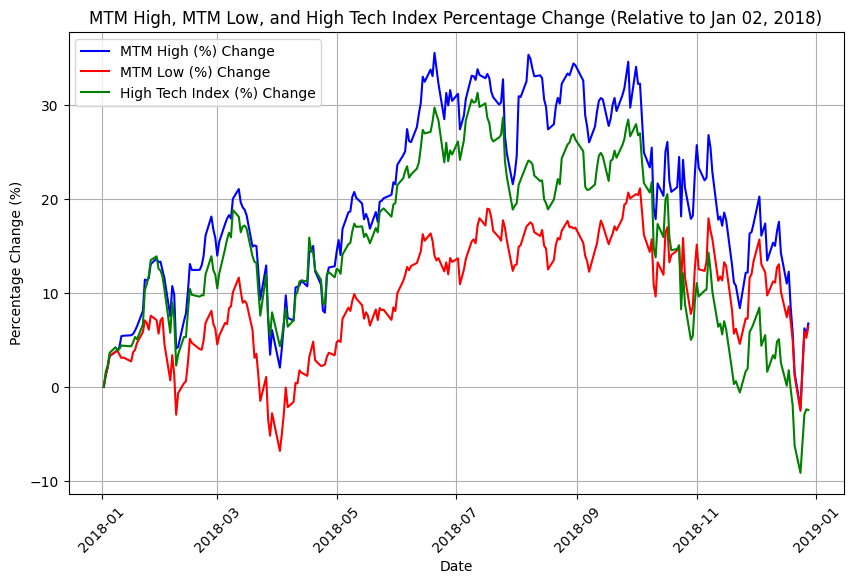

In [12]:
import matplotlib.pyplot as plt

dates = closeAndAdjClose.index

# series for mtm values for buying low/high and high tech index
mtm_high_series = pd.Series(mtm_high, index=dates)
mtm_low_series = pd.Series(mtm_low, index=dates)
high_tech_index_series = pd.Series(highTechIndex, index=dates)

# align dates
mtm_high_start = mtm_high_series.loc['2018-01-02']
mtm_low_start = mtm_low_series.loc['2018-01-02']
high_tech_start = high_tech_index_series.loc['2018-01-02']

# calculate percentage change for each
mtm_high_pct_change = (mtm_high_series / mtm_high_start - 1) * 100
mtm_low_pct_change = (mtm_low_series / mtm_low_start - 1) * 100
high_tech_pct_change = (high_tech_index_series / high_tech_start - 1) * 100

# plot data
plt.figure(figsize=(10, 6))
plt.plot(dates, mtm_high_pct_change, label='MTM High (%) Change', color='blue')
plt.plot(dates, mtm_low_pct_change, label='MTM Low (%) Change', color='red')
plt.plot(dates, high_tech_pct_change, label='High Tech Index (%) Change', color='green')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('MTM High, MTM Low, and High Tech Index Percentage Change (Relative to Jan 02, 2018)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### USD/JPY Conversion

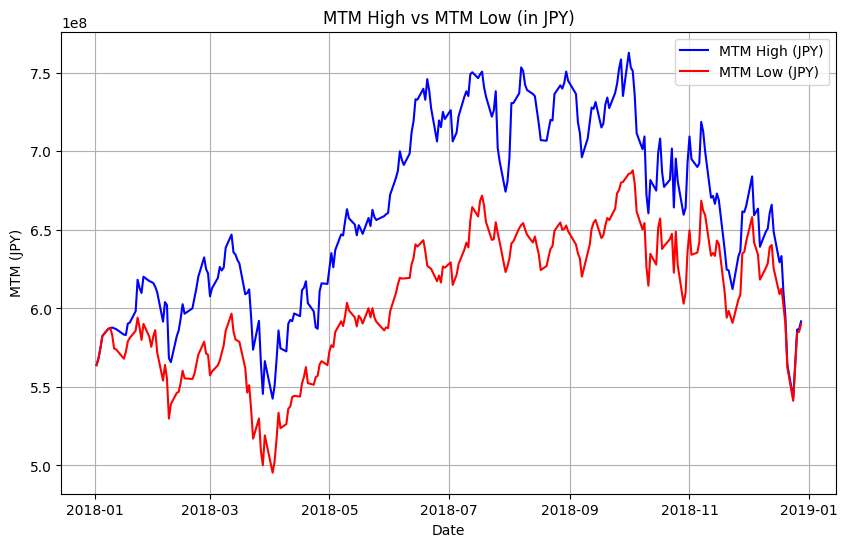

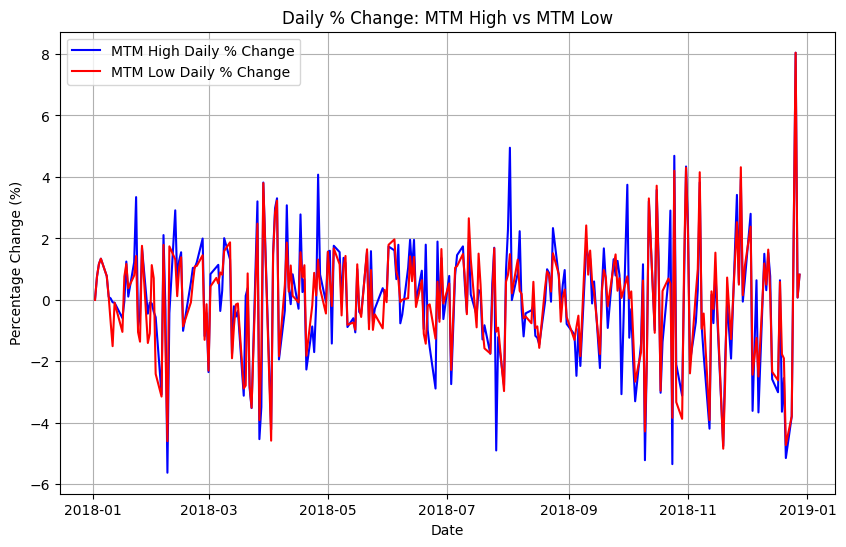

In [13]:
# read usdjpy csv and convert to df
usdjpy_df = pd.read_csv('usdjpy.csv', parse_dates=['Date'], index_col='Date', encoding='ISO-8859-1', date_format='%d-%b-%y')

# Sort df by date in ascending order and get close column
usdjpy_df = usdjpy_df.sort_index()
# print(usdjpy_df)
usdjpy_df.columns = usdjpy_df.columns.str.strip()
usdjpy_close = usdjpy_df['Closeÿ']
#print(usdjpy_close)

# get series of mtm for buying low and high
mtm_high_usd = pd.Series(mtm_high, index=closeAndAdjClose.index)
mtm_low_usd = pd.Series(mtm_low, index=closeAndAdjClose.index)

# align the dates
usdjpy_close_aligned = usdjpy_close.reindex(closeAndAdjClose.index).ffill()

# convert mtm values to jpy
mtm_high_jpy = mtm_high_usd * usdjpy_close_aligned
mtm_low_jpy = mtm_low_usd * usdjpy_close_aligned

# calculate percentage change
mtm_high_pct_change = mtm_high_jpy.pct_change().fillna(0) * 100
mtm_low_pct_change = mtm_low_jpy.pct_change().fillna(0) * 100


# plot mtm in jpy
plt.figure(figsize=(10, 6))
plt.plot(mtm_high_jpy, label='MTM High (JPY)', color='blue')
plt.plot(mtm_low_jpy, label='MTM Low (JPY)', color='red')
plt.title('MTM High vs MTM Low (in JPY)')
plt.xlabel('Date')
plt.ylabel('MTM (JPY)')
plt.legend()
plt.grid(True)
plt.show()

# plot the daily percentage change for mtm series
plt.figure(figsize=(10, 6))
plt.plot(mtm_high_pct_change, label='MTM High Daily % Change', color='blue')
plt.plot(mtm_low_pct_change, label='MTM Low Daily % Change', color='red')
plt.title('Daily % Change: MTM High vs MTM Low')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()

## Different Rebalncing Intervals

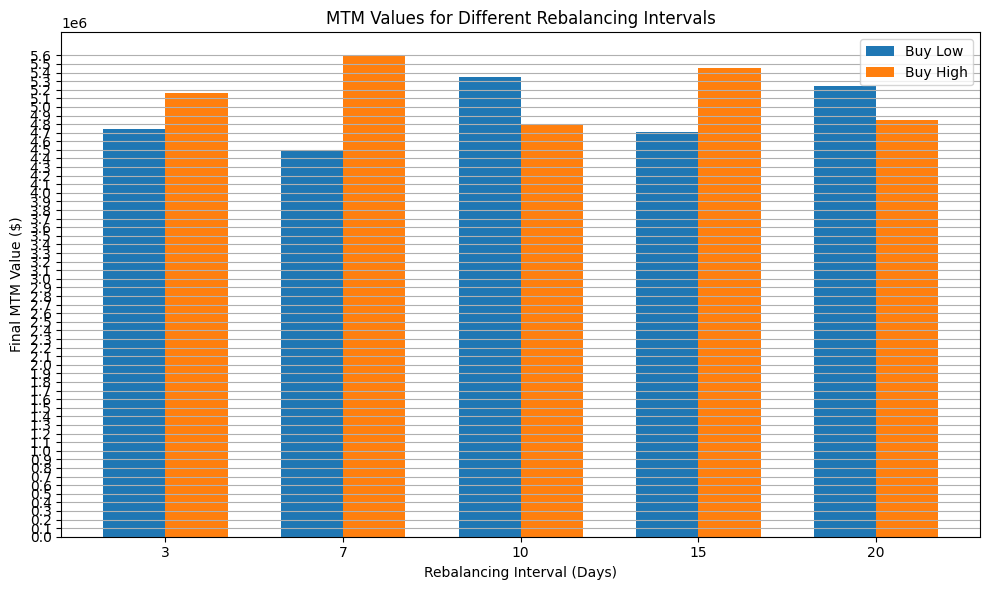

In [15]:
# different rebalancing intervals
rebalance_intervals = [3, 7, 10, 15, 20]

# initial portfolio of 5000000 split amongst 5 specific stocks
initialInvestment = 5000000
investmentPerStock = initialInvestment / 5
portfolioStocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
diffPortfolios = {}
cashAccount = initialInvestment

for stock in portfolioStocks:
  stock_close_price = closeAndAdjClose.loc['2018-01-02'][f'{stock}_Close']
  shares = investmentPerStock // stock_close_price
  diffPortfolios[stock] = shares
  cashAccount -= shares * stock_close_price
cashAccount = cashAccount.round(2)
diffPortfolios['cash'] = cashAccount



# used to store results
results = {}

# try diff rebalance intervals
for interval in rebalance_intervals:
    current_portfolio = diffPortfolios.copy()
    total_cash = cashAccount
    mtm_values = []

    # different rebalancing days depending on rebalance interval
    rebalance_days = pd.date_range(start=closeAndAdjClose.index.min(), end=closeAndAdjClose.index.max(), freq=f'{interval}D')

    for date in closeAndAdjClose.index:
        # get daily mtm value of portfolio
        mtm_value = total_cash
        for stock, shares in current_portfolio.items():
            if stock != 'cash':
                stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
                mtm_value += shares * stock_close_price
        mtm_values.append(mtm_value)

        # check if dividends were receieved
        dividend_received = False
        for stock, shares in highPortfolio.items():
            if stock == 'cash':
                  continue
            dividend_days = all_dividends[(all_dividends['Stock'] == stock) &
                                              (all_dividends['Date'] == date)]
            for _, dividend_row in dividend_days.iterrows():
                dividend_amount = dividend_row['Dividend']
                total_cash += shares * dividend_amount
                #print(f"Received dividend for holding {shares} shares of {stock} on {date}: ${shares * dividend_amount:.2f}")
                dividend_received = True

        # rebalancing day
        if date in rebalance_days:
            if date == rebalance_days[0]:
                continue
            #print('\n')
            previous_date = rebalance_days[rebalance_days.get_loc(date) - 1]
            #print("current_portfolio: ", current_portfolio)

            # calculate price changes and select worst performers
            price_changes = {}
            for stock in universe:
                price_change_df = closeAndAdjClose.loc[previous_date:date, [f'{stock}_AdjClose']]
                price_change = (price_change_df.iloc[-1][f'{stock}_AdjClose'] - price_change_df.iloc[0][f'{stock}_AdjClose']) / price_change_df.iloc[0][f'{stock}_AdjClose'] * 100
                price_changes[stock] = price_change.round(2)
            sorted_stocks = sorted(price_changes.items(), key=lambda x: x[1])
            worst_performers = [stock[0] for stock in sorted_stocks[:5]]
            #print("worst_performers: ", worst_performers)

            # sell current holdings and convert to cash
            cash_from_sales = 0
            for stock in current_portfolio:
                if stock == 'cash':
                    continue
                stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
                shares = current_portfolio[stock]
                cash_from_sales += shares * stock_close_price
            cash_from_sales = cash_from_sales.round(2)
            total_cash += cash_from_sales


            # buy worst performing stocks
            investmentPerStock = total_cash / 5
            new_portfolio = {}
            for stock in worst_performers:
                stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
                shares = investmentPerStock // stock_close_price
                new_portfolio[stock] = shares
                total_cash -= shares * stock_close_price

            current_portfolio = new_portfolio
            current_portfolio['cash'] = total_cash
            #print("updated_portfolio: ", current_portfolio, '\n')

    # store final mtm value for each rebalancing interval
    results[interval] = mtm_values[-1]




# initial portfolio of 5000000 split amongst 5 specific stocks
initialInvestment = 5000000
investmentPerStock = initialInvestment / 5
portfolioStocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
diffPortfolios = {}
cashAccount = initialInvestment

for stock in portfolioStocks:
  stock_close_price = closeAndAdjClose.loc['2018-01-02'][f'{stock}_Close']
  shares = investmentPerStock // stock_close_price
  diffPortfolios[stock] = shares
  cashAccount -= shares * stock_close_price
cashAccount = cashAccount.round(2)
diffPortfolios['cash'] = cashAccount
#print("Initial Portfolio:", portfolio)


# store results
high_results = {}

# try diff rebalancing intervals
for interval in rebalance_intervals:
    current_portfolio = diffPortfolios.copy()
    total_cash = cashAccount
    mtm_values = []

    # get rebalance days based on interval
    rebalance_days = pd.date_range(start=closeAndAdjClose.index.min(), end=closeAndAdjClose.index.max(), freq=f'{interval}D')

    for date in closeAndAdjClose.index:
        # get daily mtm value of portfolio
        mtm_value = total_cash
        for stock, shares in current_portfolio.items():
            if stock != 'cash':
                stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
                mtm_value += shares * stock_close_price
        mtm_values.append(mtm_value)

        # check to see if dividends were received
        dividend_received = False
        for stock, shares in highPortfolio.items():
            if stock == 'cash':
                  continue
            dividend_days = all_dividends[(all_dividends['Stock'] == stock) &
                                              (all_dividends['Date'] == date)]
            for _, dividend_row in dividend_days.iterrows():
                dividend_amount = dividend_row['Dividend']
                total_cash += shares * dividend_amount
                #print(f"Received dividend for holding {shares} shares of {stock} on {date}: ${shares * dividend_amount:.2f}")
                dividend_received = True

        # rebalance day
        if date in rebalance_days:
            if date == rebalance_days[0]:
                continue
            #print('\n')
            previous_date = rebalance_days[rebalance_days.get_loc(date) - 1]
            #print("current_portfolio: ", current_portfolio)

            # calculate price changes and get best performers
            price_changes = {}
            for stock in universe:
                price_change_df = closeAndAdjClose.loc[previous_date:date, [f'{stock}_AdjClose']]
                price_change = (price_change_df.iloc[-1][f'{stock}_AdjClose'] - price_change_df.iloc[0][f'{stock}_AdjClose']) / price_change_df.iloc[0][f'{stock}_AdjClose'] * 100
                price_changes[stock] = price_change.round(2)
            sorted_stocks = sorted(price_changes.items(), key=lambda x: x[1], reverse=True)
            best_performers = [stock[0] for stock in sorted_stocks[:5]]
            #print("worst_performers: ", worst_performers)

            # sell all current holdings and convert to cash
            cash_from_sales = 0
            for stock in current_portfolio:
                if stock == 'cash':
                    continue
                stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
                shares = current_portfolio[stock]
                cash_from_sales += shares * stock_close_price
            cash_from_sales = cash_from_sales.round(2)
            total_cash += cash_from_sales

            # buy top performing stocks
            investmentPerStock = total_cash / 5
            new_portfolio = {}
            for stock in best_performers:
                stock_close_price = closeAndAdjClose.loc[date][f'{stock}_Close']
                shares = investmentPerStock // stock_close_price
                new_portfolio[stock] = shares
                total_cash -= shares * stock_close_price

            current_portfolio = new_portfolio
            current_portfolio['cash'] = total_cash
            #print("updated_portfolio: ", current_portfolio, '\n')

    # store mtm value of this interval
    high_results[interval] = mtm_values[-1]



results = {
    "Buy Low": results,
    "Buy High": high_results
}

# get intervals and mtm values for both strategies
intervals = list(results["Buy Low"].keys())
mtm_values_1 = list(results["Buy Low"].values())
mtm_values_2 = list(results["Buy High"].values())

# plot data
bar_width = 0.35
x = np.arange(len(intervals))
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, mtm_values_1, bar_width, label='Buy Low')
bars2 = plt.bar(x + bar_width/2, mtm_values_2, bar_width, label='Buy High')
plt.title('MTM Values for Different Rebalancing Intervals')
plt.xlabel('Rebalancing Interval (Days)')
plt.ylabel('Final MTM Value ($)')
plt.xticks(x, intervals)
plt.yticks(np.arange(0, max(max(mtm_values_1), max(mtm_values_2)) + 1e5, 1e5))
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()
